<div >
<img src = "../banner.jpg" />
</div>

<a target="_blank" href="https://colab.research.google.com/github/ignaciomsarmiento/BDML_202520/blob/main/Lecture10/Notebook_Boosting_toy_example.ipynb">
  <img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/>
</a>


## Boosting Trees: Toy Example

Let's load the packages:

In [1]:
# install.packages("pacman") #run this line if you use Google Colab

In [2]:
#packages
require("pacman")
p_load("tidyverse","ggplot2","rpart")

Loading required package: pacman



In [3]:


db<-read.csv("https://raw.githubusercontent.com/ignaciomsarmiento/datasets/main/boosting_tree_toy.csv")
head(db)

y<-db$y
x<-db$x

X x          y          
1 1 0.08216883  0.19462317
2 2 0.08413394  0.07939476
3 3 0.14659427  0.06655269
4 4 0.17459164 -0.05863454
5 5 0.22330805 -0.15040834
6 6 0.29192236  0.01899571

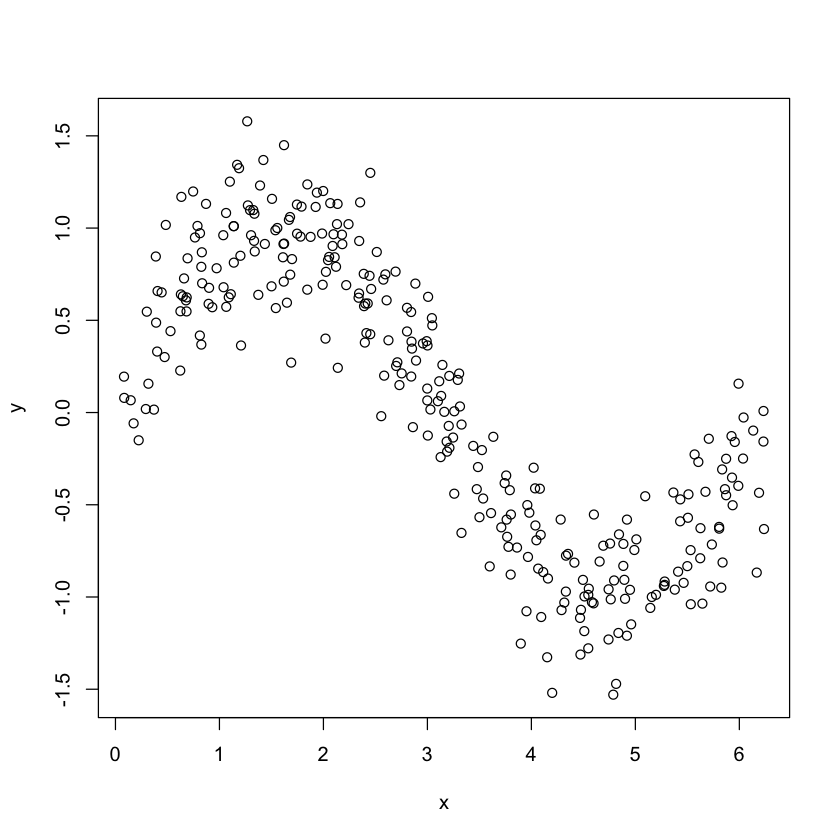

In [4]:
plot(x,y)

### Hiperparámetros

- $\lambda$ la tasa a la que aprende, los valores típicos son 0.01 o 0.001

In [5]:
lambda<-.01

- Tamaño del árbol. Arboles pocos profundos  funcionan bien.

In [6]:
d<-1 #stump

- Iniciamos fijando $\hat{f}(x)=0$ y $r_i=y_i$ para todos los $i$ del training set

In [7]:
fhat=rep(0,length(y))

r=y

In [8]:
head(y)

[1]  0.19462317  0.07939476  0.06655269 -0.05863454 -0.15040834  0.01899571

In [9]:
head(r)

[1]  0.19462317  0.07939476  0.06655269 -0.05863454 -0.15040834  0.01899571

Para $m=1,2,...,M$

 - Ajustamos un árbol $\hat{f}^m$ con $d$ bifurcaciones ($d+1$ hojas)

In [10]:
#Primera iteración
fit1<-rpart(r ~ x, control = list(maxdepth = d))
yhat1<-predict(fit1,newdata=data.frame(x))

head(lambda *yhat1)

1           2           3           4           5           6 
0.006803402 0.006803402 0.006803402 0.006803402 0.006803402 0.006803402

   - Actualizamos $\hat{f}(x)$ con una versión "shrunken" del nuevo árbol

In [11]:
f1<-fhat + lambda *yhat1

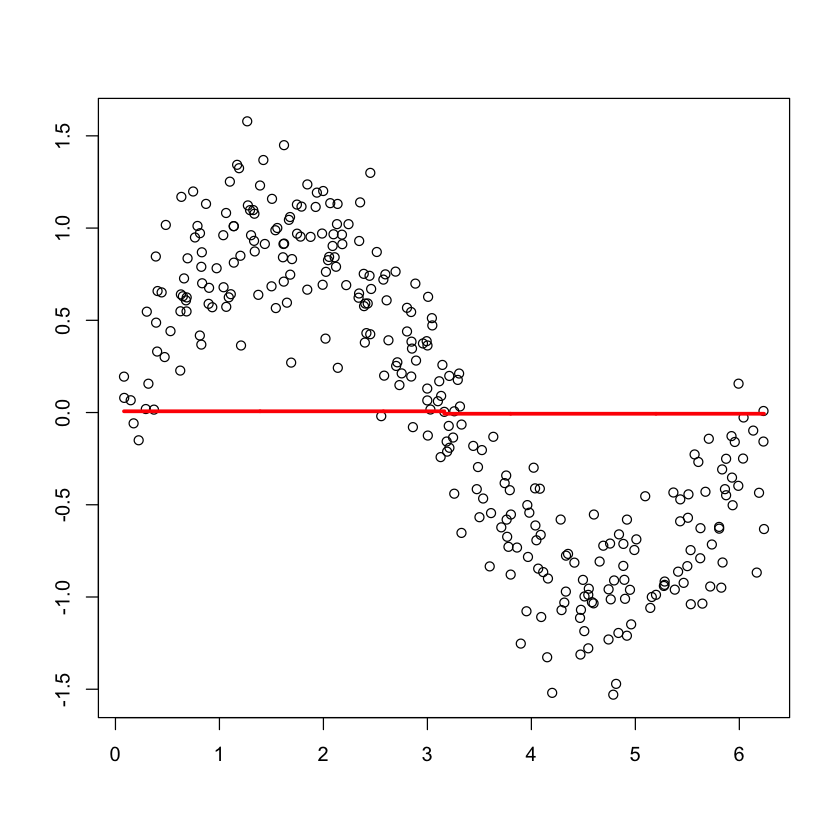

In [12]:
plot(x,y,ylab="",xlab="")
lines(x,f1,type="s",col="red",lwd=3)

- Actualizamos los residuales
  \begin{align}
  r_i\leftarrow r_i-\lambda\hat{f}^m(x)
  \end{align}

In [13]:
r1<- r - lambda*yhat1

El loop vuelve a iniciar, en la iteración 2:

In [14]:
# iteracion 2

fit2<-rpart(r1 ~ x, control = list(maxdepth = d))
yhat2<-predict(fit2,newdata=data.frame(x))
f2<- f1 + lambda *yhat2

head(lambda *yhat2)

1           2           3           4           5           6 
0.006735368 0.006735368 0.006735368 0.006735368 0.006735368 0.006735368

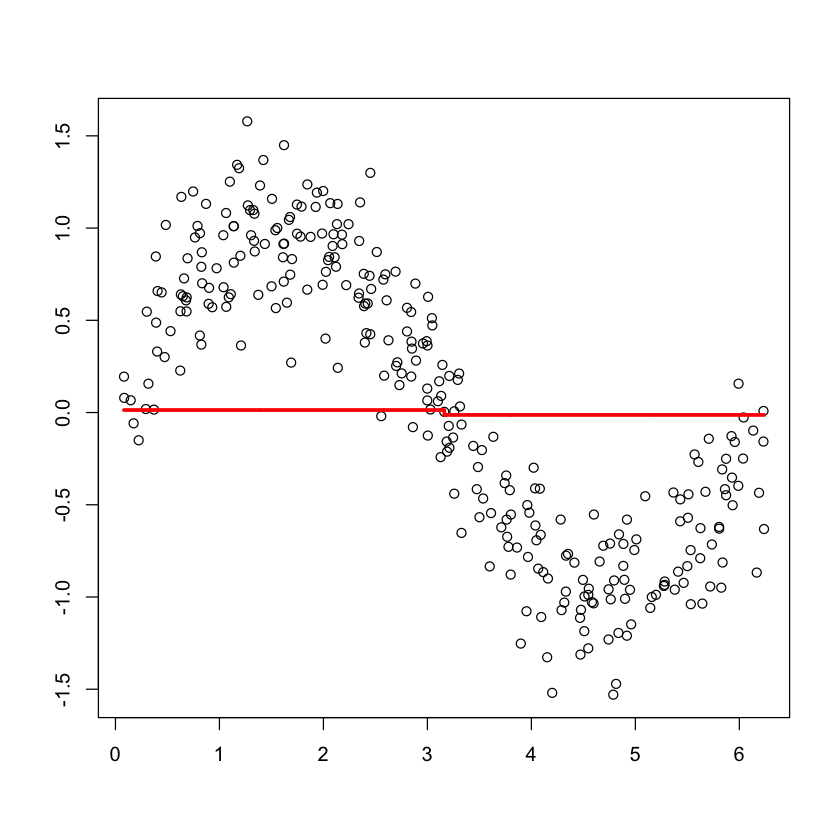

In [15]:
plot(x,y,ylab="",xlab="")
lines(x,f2,type="s",col="red",lwd=3)

In [16]:
head(f2)

1          2          3          4          5          6 
0.01353877 0.01353877 0.01353877 0.01353877 0.01353877 0.01353877

In [17]:
# En un loop
fhat<-rep(0,length(y))

r = y

YP<-lambda*fhat

for(t in 1:500){
  fit <- rpart(r~x, control = list(maxdepth = 1))
  yhat<- predict(fit,newdata=data.frame(x))
  r <-  r - lambda*yhat
  YP <-  cbind(YP,lambda*yhat)}

head(YP)

YP                                                                        
1 0  0.006803402 0.006735368 0.006627889 0.006724171 0.006497559 0.006591954
2 0  0.006803402 0.006735368 0.006627889 0.006724171 0.006497559 0.006591954
3 0  0.006803402 0.006735368 0.006627889 0.006724171 0.006497559 0.006591954
4 0  0.006803402 0.006735368 0.006627889 0.006724171 0.006497559 0.006591954
5 0  0.006803402 0.006735368 0.006627889 0.006724171 0.006497559 0.006591954
6 0  0.006803402 0.006735368 0.006627889 0.006724171 0.006497559 0.006591954
                                     ...                           
1 0.006369791 0.005899604 0.00640334 ... -0.0001885495 0.0003900661
2 0.006369791 0.005899604 0.00640334 ... -0.0001885495 0.0003900661
3 0.006369791 0.005899604 0.00640334 ... -0.0001885495 0.0003900661
4 0.006369791 0.005899604 0.00640334 ... -0.0001885495 0.0003900661
5 0.006369791 0.005899604 0.00640334 ... -0.0001885495 0.0003900661
6 0.006369791 0.005899604 0.00640334 ... -0.0001885495 0.0003900661
                                                                   
1 -0.002124851 0.0007237985 -0.0001881118 0.0003866112 -0.003215553
2 -0.002124851 0.0007237985 -0.0001881118 0.0003866112 -0.003215553
3 -0.002124851 0.0007237985 -0.0001881118 0.0003866112 -0.003215553
4 -0.002124851 0.0007237985 -0.0001881118 0.0003866112 -0.003215553
5 -0.002124851 0.0007237985 -0.0001881118 0.0003866112 -0.003215553
6 -0.002124851 0.0007237985 -0.0001881118 0.0003866112 -0.003215553
                                         
1 -0.0001871677 0.0003850282 -0.002100906
2 -0.0001871677 0.0003850282 -0.002100906
3 -0.0001871677 0.0003850282 -0.002100906
4 -0.0001871677 0.0003850282 -0.002100906
5 -0.0001871677 0.0003850282 -0.002100906
6 -0.0001871677 0.0003850282 -0.002100906

In [18]:
sum(YP[1,c(1,2,3)])

[1] 0.01353877

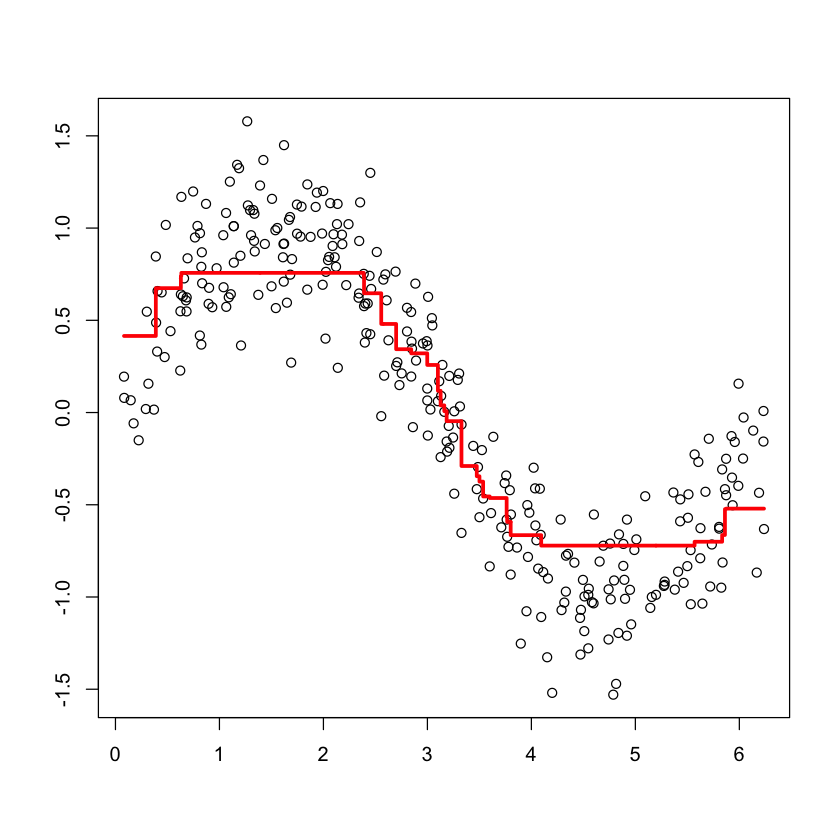

In [19]:
M<-500

fhat<-apply(YP[,1:M],1,sum)

plot(x,y,ylab="",xlab="")
lines(x,fhat,type="s",col="red",lwd=3)